### Evaluation of the strategy 

In this case we consider the dynamic output of the controlled platoon and compute the indexes of consumption for each strategy. Be sure to have `.csv` created by`platoon-closed.py` before running this notebook. 

In [236]:
import matplotlib
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
import glob 

Creating file names per variable

In [237]:
name_s = glob.glob('../output/space**.csv')
name_v = glob.glob('../output/speed**.csv')
name_u = glob.glob('../output/control**.csv')
name_r = glob.glob('../output/reference**.csv')

Reading into a a single multi indexed dataframe

In [238]:
def read_df_list(files_dist):
    """Read a set of CSV files by variable"""
    truck_list = list(range(4))
    NROW = 550
    df_list = []
    df_info = []
    for name in name_s:
        s_split = name.split('_')
        truck_id = int(s_split[2])
        s_gap = s_split[-1].split('.csv')
        gap_r = float(s_gap[0])
        df_info.append((truck_id, gap_r))
        df_list.append(pd.read_csv(name, delimiter='\t', names = truck_list, nrows = NROW))

    full_data = pd.concat(df_list, keys = df_info)
    df = full_data.reset_index()
    
    df.columns = ['id','gap','t']+list(df.columns)[3:]
    df['t'] = df['t'].apply(lambda x: x*0.1)
    df = df.set_index(['id','gap','t'])
    return df 

In [239]:
df_s = read_df_list(name_s)
df_v = read_df_list(name_v)
df_u = read_df_list(name_u)
df_r = read_df_list(name_r)

Brief example of the regulated variables and multiple index slicing 

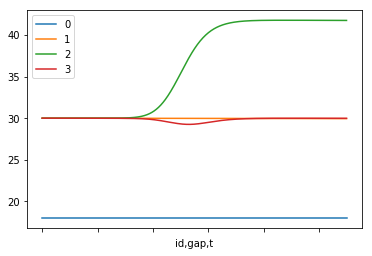

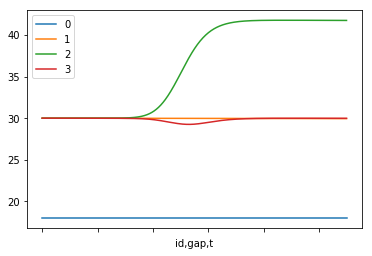

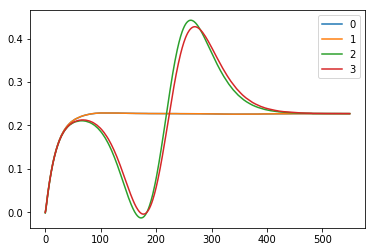

In [256]:
df_s.index
gap_v = [1.2,
         1.7999999999999998, 
         2.4]

df_s.loc[(2,gap_v[0],slice(None)),:].plot();
df_u.loc[(2,gap_v[0],slice(None)),:].plot();
a = pd.read_csv(name_u[0], delimiter = '\t', names = [0,1,2,3], nrows = 550)
a.plot()